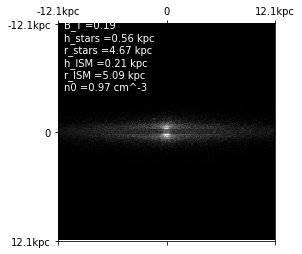

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from tkinter import *

#Path to the executable file:
codepath='C:\\Users\\Dan\\Documents\\GitHub\\Python\\'
filename='CMacIonize.exe --params test_dustsimulation.param --dusty-radiative-transfer --threads 8'

def simulation():
	B_T=w1.get()
	h_stars=w2.get()
	r_stars=w3.get()
	h_ISM=w4.get()
	r_ISM=w5.get()
	n_0=w6.get()

	nphotons=100000

	#Replace the old .param file with a new one with the entered values
	with open('test_dustsimulation_original.param') as g:
		lines=list(g)

	h=open('test_dustsimulation.param','w')
	for i in range(0,len(lines)):
		if i==12:
			h.write('  B_over_T: '+str(B_T)+'\n')
		elif i==13:
			h.write( '  h_stars: '+str(h_stars)+' kpc\n' )
		elif i==14:
			h.write('  r_stars: '+str(r_stars)+' kpc\n'  )
		elif i==16:
			h.write('  h_ISM: '+str(h_ISM)+' kpc\n'  )
		elif i==18:
			h.write('  r_ISM: '+str(r_ISM)+' kpc\n'  )
		elif i==17:
			h.write('  n_0: '+str(n_0)+' cm^-3\n' )
		elif i==28:
			h.write('number of photons: '+str(nphotons)+'\n'  )
		else:
			h.write(lines[i])
	h.close()

	#Input this new file into the testDustSimulation program and compile
	os.system(codepath+filename)  

	#Input the created binary file, and plot as an image
	image = np.fromfile("test_dustsimulation_output.dat", dtype = np.float64)
	image = image.reshape((200, 200))
	fig, ax = plt.subplots() 
	ax.matshow(np.transpose(image), cmap='Greys_r')
#	ax.matshow(np.transpose(image), cmap=plt.cm.bBu)
	plt.text(5,60,"B_T ="+str(B_T)+'\n'+"h_stars ="+str(h_stars)+" kpc"+'\n'+"r_stars ="+str(r_stars)+" kpc"+'\n'+"h_ISM ="+str(h_ISM)+" kpc"+'\n'+"r_ISM ="+str(r_ISM)+" kpc"+'\n'+"n0 ="+str(n_0)+" cm^-3",color='w')

	tick_locs_x = [0,100,200]
	tick_locs_y = [0,100,200]

	xtick_lbls = ['-12.1kpc','0','12.1kpc']
	ytick_lbls = ['-12.1kpc','0','12.1kpc']

	plt.xticks(tick_locs_x, xtick_lbls,rotation=0,fontsize=10)
	plt.yticks(tick_locs_y, ytick_lbls,rotation=0,fontsize=10)
	plt.show()


master = Tk()
w1 = Scale(master, from_=0.0, to=1.0,resolution=0.01, orient=HORIZONTAL,length=500,label="B/T")
w1.pack()
w2 = Scale(master, from_=0.0, to=2.0,resolution=0.01, orient=HORIZONTAL,length=500,label="h_stars [kpc]")
w2.pack()
w3 = Scale(master, from_=0.0, to=7.0,resolution=0.01, orient=HORIZONTAL,length=500,label="r_stars [kpc]")
w3.pack()
w4 = Scale(master, from_=0.0, to=2.0,resolution=0.01, orient=HORIZONTAL,length=500,label="h_ISM [kpc]")
w4.pack()
w5 = Scale(master, from_=0.0, to=7.0,resolution=0.01, orient=HORIZONTAL,length=500,label="r_ISM [kpc]")
w5.pack()
w6 = Scale(master, from_=0.0, to=3.0,resolution=0.01, orient=HORIZONTAL,length=500,label="n_0 [cm^-3]")
w6.pack()
Button(master, text='Simulate', command=simulation
).pack()

mainloop()
